In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pylab as plt
import tensorflow as tf

from keras.applications.vgg16 import VGG16

#Importing libraries for CNN architecture models,linear algebra and data visualization.

Using TensorFlow backend.


In [2]:
import scipy.io as sio
#read data from .mat file
train_data = sio.loadmat('../input/svhndataset/train_32x32.mat')
test_data = sio.loadmat('../input/svhndataset/test_32x32.mat')
extra_data = sio.loadmat('../input/svhndataset/extra_32x32.mat')

#X are the pixels of the images and y are the corresponding labels,which means that this is supervised learning data.
X_train, y_train = train_data['X'], train_data['y']
X_test, y_test = test_data['X'], test_data['y']
X_extra, y_extra = extra_data['X'], extra_data['y']

# defining classes as it is a classfication problem
classes = [0,1,2,3,4,5,6,7,8,9]
num_classes = 10
no_classes=11


In [3]:
#Here we are transforming the input data so that each instance of data represents pixels values of each image in all of three channels(RGB)
#which will act as an input to first layer of CNN.
X_train = np.transpose(X_train,(3,0,1,2))
X_test = np.transpose(X_test,(3,0,1,2))
X_extra = np.transpose(X_extra,(3,0,1,2))

#we add the extra data with the training set
X_train = np.concatenate([X_train, X_extra])
y_train = np.concatenate([y_train, y_extra])

#Here we normalize the pixel values to the same range so that model can perform better.
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [4]:
from keras.utils import to_categorical

#Here we convert the label to category from 1-10 to match with CNN format
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


Below are the four models:
* Resnet50
* VGG16
* VGG19
* CNN

execute anyone model at a time.

In [30]:
#Resnet50 Model
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D, BatchNormalization
model = Sequential()
model.add(ResNet50(include_top=True, pooling='avg', weights=None,input_shape=X_train[0].shape, classes=no_classes))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',      
              metrics=['acc'])

In [5]:
#VGG16 model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(VGG16(include_top=True, weights=None, input_shape=X_train[0].shape, pooling='max', classes=no_classes))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',      
              metrics=['acc'])

In [16]:
#VGG19 model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

from keras.applications.vgg19 import VGG19
model = Sequential()
model.add(VGG19(include_top=True, weights=None, input_shape=X_train[0].shape, pooling='max', classes=no_classes))


model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',      
              metrics=['acc'])

In [ ]:
# CNN model with 2 convolutional layers,one pooling layer and fully connected layer
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=4, activation='relu', input_shape=X_train[0].shape))
model.add(MaxPooling2D(pool_size=3))
model.add(Conv2D(64, kernel_size=4, activation='relu'))
model.add(Flatten())
model.add(Dense(len(y_train[0]), activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',      
              metrics=['accuracy'])

In [ ]:
#it shows the architecture of the model
model.summary()

Depending upon which model you chose, train that model.

In [ ]:
#for CNN network training
Here model is being trained on the data with batch size 200 and epochs 10 and data split 10%
model_history = model.fit(X_train, y_train, batch_size=200, epochs=10, validation_split = 0.1)

In [31]:
#for VGG16 and VGG19 training and Resnet 50 training
#Here model is being trained on the data with batch size 200 and epochs 10 and data split 10%
model_history = model.fit(X_train, y_train, batch_size=500, epochs=5, validation_split = 0.2)

Train on 483510 samples, validate on 120878 samples
Epoch 1/5
483510/483510 [==============================] - 168s 348us/sample - loss: 0.5511 - acc: 0.8251 - val_loss: 0.4105 - val_acc: 0.8792
Epoch 2/5
483510/483510 [==============================] - 158s 327us/sample - loss: 0.1758 - acc: 0.9470 - val_loss: 0.1404 - val_acc: 0.9571
Epoch 3/5
483510/483510 [==============================] - 158s 327us/sample - loss: 0.1254 - acc: 0.9632 - val_loss: 0.1620 - val_acc: 0.9503
Epoch 4/5
483510/483510 [==============================] - 159s 328us/sample - loss: 0.1287 - acc: 0.9629 - val_loss: 11.0049 - val_acc: 0.6167
Epoch 5/5
483510/483510 [==============================] - 158s 327us/sample - loss: 0.1714 - acc: 0.9495 - val_loss: 2.8975 - val_acc: 0.7992


/opt/conda/lib/python3.6/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "bottom right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


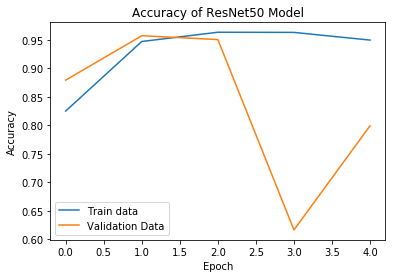

In [32]:
#Here we plot the performance of the model on the training and validation data.
plt.plot(model_history.history["acc"])
plt.plot(model_history.history['val_acc'])
plt.title('Accuracy of ResNet50 Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train data', 'Validation Data'], loc='bottom right')
plt.show()

In [33]:
#Here we calculate the accuracy of the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 2.2760564250380404
Test accuracy: 0.70106024


We can safely say that by increasing the model layers too much degrades our model performance maybe?